<a href="https://colab.research.google.com/github/InesAgudoMartin/APRENDIZAJE_AUTOMATICO_23_24/blob/main/LAB4_E1_GROUP%5B11%5Dv1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv("vehicles_co2.csv", header = 0)

In [ ]:
df.head()

,manufacturer,model,vehicle_class,engine_size_l,cylinders,transmission,fuel_type,fuel_consumption_city_l_per_100km,fuel_consumption_hwy_l_per_100km,fuel_consumption_comb_l_per_100km,fuel_consumption_comb_mpg,co2_emissions_g_per_km
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
print(df.isnull().sum())

manufacturer                         0
model                                0
vehicle_class                        0
engine_size_l                        0
cylinders                            0
transmission                         0
fuel_type                            0
fuel_consumption_city_l_per_100km    0
fuel_consumption_hwy_l_per_100km     0
fuel_consumption_comb_l_per_100km    0
fuel_consumption_comb_mpg            0
co2_emissions_g_per_km               0
dtype: int64


In [ ]:
print(df.duplicated().sum())

1103


In [ ]:
len(df)

7385

In [ ]:
df_clean = df.drop_duplicates()

In [ ]:
print(df_clean.duplicated().sum())

0


In [ ]:
len(df_clean)

6282

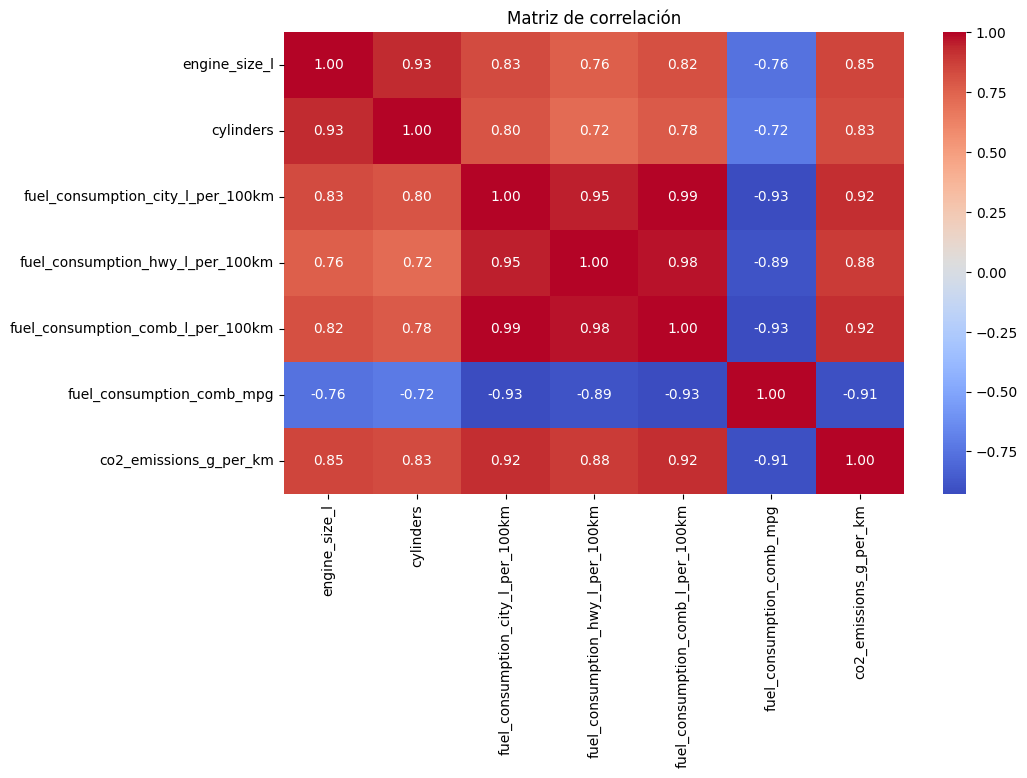

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Solo variables numéricas
numeric_vars = [
    'engine_size_l', 'cylinders',
    'fuel_consumption_city_l_per_100km',
    'fuel_consumption_hwy_l_per_100km',
    'fuel_consumption_comb_l_per_100km',
    'fuel_consumption_comb_mpg',
    'co2_emissions_g_per_km'
]

correlation_matrix = df[numeric_vars].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


##REGRESIÓN MULTIVARIABLE

In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
features = [

    'fuel_consumption_city_l_per_100km',
    'fuel_consumption_hwy_l_per_100km',
    'fuel_consumption_comb_mpg',
    'engine_size_l',
    'cylinders'

]

# X = variables predictoras, y = variable objetivo
X = df[features]
y = df['co2_emissions_g_per_km']

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)


MSE: 337.4597605023134
R²: 0.9018906062103024
Coeficientes: [ 0.99164856  5.09294727 -3.4487026   4.9611003   7.49218247]
Intercepto: 229.1722991463202


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
features = [

    'fuel_consumption_city_l_per_100km',
    'fuel_consumption_comb_mpg',
    'engine_size_l',
    'cylinders'

]

# X = variables predictoras, y = variable objetivo
X = df[features]
y = df['co2_emissions_g_per_km']

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

MSE: 353.5720958067127
R²: 0.8972062804498089
Coeficientes: [ 4.12335754 -3.5604771   5.19154978  6.61841387]
Intercepto: 243.1410439948632


##Clustering particionado

In [1]:
# Volver a cargar el dataset y ejecutar con un subconjunto para evitar error de memoria
import pandas as pd
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Cargar y limpiar dataset
df = pd.read_csv("C:\Users\usuario\Desktop\MINERÍA\PRACTICA 4\vehicles_co2.csv").drop_duplicates()

# Seleccionar y escalar variables relevantes
features = [
    'engine_size_l', 'cylinders',
    'fuel_consumption_city_l_per_100km',
    'fuel_consumption_hwy_l_per_100km',
    'fuel_consumption_comb_l_per_100km',
    'fuel_consumption_comb_mpg',
    'co2_emissions_g_per_km'
]
df_features = df[features].sample(n=200, random_state=42)  # muestreo para reducir carga

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Dendrograma
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Dendrograma - Clustering Jerárquico (200 muestras)")
plt.xlabel("Vehículos")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/vehicles_co2.csv'